In [1]:
import pandas as pd
import numpy as np
import warnings
from scipy.sparse import load_npz
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


In [2]:
#General preprocessing
df_preprocessed_general_train = load_npz('./ds_salaries_GeneralPreprocessing_train_stratified.npz')
df_preprocessed_general_test = load_npz('./ds_salaries_GeneralPreprocessing_test_stratified.npz')

#Title Clustering
df_preprocessed_TC_train = load_npz('ds_salaries_Title_Clustering_Preprocessing_train_stratified.npz')
df_preprocessed_TC_test = load_npz('ds_salaries_Title_Clustering_Preprocessing_test_stratified.npz')

#Residence Clustering
df_preprocessed_RC_train = load_npz('ds_salaries_Residence_Clustering_train_stratified.npz')
df_preprocessed_RC_test = load_npz('ds_salaries_Residence_Clustering_test_stratified.npz')

#Feature Elimination
df_preprocessed_FE_train = load_npz('ds_salaries_Feature_Elimination_train_stratified.npz')
df_preprocessed_FE_test = load_npz('ds_salaries_Feature_Elimination_test_stratified.npz')

#Combined Preprocessing
df_preprocessed_CP_train = load_npz('ds_salaries_Combined_Preprocessing_train_stratified.npz')
df_preprocessed_CP_test = load_npz('ds_salaries_Combined_Preprocessing_test_stratified.npz')

#Oversampling
df_preprocessed_oversampling_train = load_npz('./ds_salaries_Oversampling_features_train_stratified.npz')
df_target_oversampling_train = pd.read_csv('./ds_salaries_Oversampling_target_train_stratified.csv')

#General targets
df_target_train = pd.read_csv("./ds_salaries_target_train_stratified.csv")
df_target_test = pd.read_csv("./ds_salaries_target_test_stratified.csv")

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Mean Prediction

In [6]:
# Calculate the mean of the training target
mean_salary_train = df_target_train.mean()

# Mean Model Prediction
print("Mean Model Prediction: ")
print("--------------------------")
predictions = np.full(shape=len(df_target_test), fill_value=mean_salary_train)
r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)
print("R2: ",  r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")


Mean Model Prediction: 
--------------------------
R2:  -8.247295537144872e-05
MSE:  4490557677.054264



In [5]:
df_target_train.mean()

salary_in_usd    133287.525399
dtype: float64

# Baseline Model (Linear Regression)

In [12]:
estimator = LinearRegression()

steps = [('estimator', estimator)]

pipeline = Pipeline(steps)


print("Linear Regression: ")
print("--------------------------")

#General Preprocessing
pipeline.fit(df_preprocessed_general_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("General Preprocessing:")
print("R2: ",  r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Title Clustering
pipeline.fit(df_preprocessed_TC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_TC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Job Title Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Residence Clustering
pipeline.fit(df_preprocessed_RC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_RC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Employee Residence Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Feature Elimination
pipeline.fit(df_preprocessed_FE_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_FE_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Feature Elimination:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Combined Preprocessing
pipeline.fit(df_preprocessed_CP_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_CP_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Combined Preprocessing:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Oversampling
pipeline.fit(df_preprocessed_oversampling_train, df_target_oversampling_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Oversampling:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

Linear Regression: 
--------------------------
General Preprocessing:
R2:  0.3649801551843582
MSE:  2851358079.2910666

Job Title Clustering:
R2:  0.41883847118802464
MSE:  2609524149.6464744

Employee Residence Clustering:
R2:  0.38047848459014344
MSE:  2781767676.5225835

Feature Elimination:
R2:  0.38558602523501895
MSE:  2758833862.0883255

Combined Preprocessing:
R2:  0.44037191874643156
MSE:  2512834935.644856

Oversampling:
R2:  0.029463883175708028
MSE:  4357889002.278561



# Gradient Boosting Regression

In [13]:
estimator = GradientBoostingRegressor(learning_rate=0.1, max_depth=10, min_samples_split=20, max_features='log2', subsample=1.0, random_state = 42)
steps = [('estimator', estimator)]

pipeline = Pipeline(steps)

print("Gradient Boosting: ")
print("--------------------------")

#General Preprocessing
pipeline.fit(df_preprocessed_general_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("General Preprocessing:")
print("R2: ",  r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Title Clustering
pipeline.fit(df_preprocessed_TC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_TC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Job Title Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Residence Clustering
pipeline.fit(df_preprocessed_RC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_RC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Employee Residence Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Feature Elimination
pipeline.fit(df_preprocessed_FE_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_FE_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Feature Elimination:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Combined Preprocessing
pipeline.fit(df_preprocessed_CP_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_CP_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Combined Preprocessing:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Oversampling
pipeline.fit(df_preprocessed_oversampling_train, df_target_oversampling_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Oversampling:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

Gradient Boosting: 
--------------------------
General Preprocessing:
R2:  0.4209317944438934
MSE:  2600124736.0266967



C:\Users\defaultuser0\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\defaultuser0\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Job Title Clustering:
R2:  0.4393146877168135
MSE:  2517582101.0485673

Employee Residence Clustering:
R2:  0.4277799839793871
MSE:  2569375081.9490113

Feature Elimination:
R2:  0.4260060183977594
MSE:  2577340519.777221



C:\Users\defaultuser0\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\defaultuser0\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\defaultuser0\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Combined Preprocessing:
R2:  0.42002787530168384
MSE:  2604183502.33173



C:\Users\defaultuser0\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Oversampling:
R2:  0.42594359870070586
MSE:  2577620795.9118233



# eXtreme Boost Regression

In [14]:
estimator = XGBRegressor(colsample_bylevel=0.25, gamma=0, learning_rate=0.05, max_depth=5, subsample=0.5, random_state = 42)
steps = [('estimator', estimator)]

pipeline = Pipeline(steps)

print("Extreme Gradient Boosting: ")
print("--------------------------")

#General Preprocessing
pipeline.fit(df_preprocessed_general_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("General Preprocessing:")
print("R2: ",  r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Title Clustering
pipeline.fit(df_preprocessed_TC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_TC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Job Title Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Residence Clustering
pipeline.fit(df_preprocessed_RC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_RC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Employee Residence Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Feature Elimination
pipeline.fit(df_preprocessed_FE_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_FE_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Feature Elimination:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Combined Preprocessing
pipeline.fit(df_preprocessed_CP_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_CP_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Combined Preprocessing:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Oversampling
pipeline.fit(df_preprocessed_oversampling_train, df_target_oversampling_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Oversampling:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

Extreme Gradient Boosting: 
--------------------------
General Preprocessing:
R2:  0.43425140538520735
MSE:  2540317187.364095

Job Title Clustering:
R2:  0.4518111671377285
MSE:  2461470567.132859

Employee Residence Clustering:
R2:  0.4264257028683518
MSE:  2575456057.8730044

Feature Elimination:
R2:  0.4286109205244344
MSE:  2565644021.179113

Combined Preprocessing:
R2:  0.44018960042753397
MSE:  2513653579.055508

Oversampling:
R2:  0.42669074487253067
MSE:  2574265969.6164927



# ANNs MLP Regressor

In [15]:
warnings.filterwarnings('ignore')

estimator = MLPRegressor(hidden_layer_sizes= ( 10,), activation='relu', alpha=0.0001, solver='lbfgs', random_state = 42)
steps = [('estimator', estimator)]

pipeline = Pipeline(steps)

print("ANNs: ")
print("--------------------------")

#General Preprocessing
pipeline.fit(df_preprocessed_general_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("General Preprocessing:")
print("R2: ",  r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Title Clustering
pipeline.fit(df_preprocessed_TC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_TC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Job Title Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Residence Clustering
pipeline.fit(df_preprocessed_RC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_RC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Employee Residence Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Feature Elimination
pipeline.fit(df_preprocessed_FE_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_FE_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Feature Elimination:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Combined Preprocessing
pipeline.fit(df_preprocessed_CP_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_CP_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Combined Preprocessing:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Oversampling
pipeline.fit(df_preprocessed_oversampling_train, df_target_oversampling_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Oversampling:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

ANNs: 
--------------------------
General Preprocessing:
R2:  0.3833956395106395
MSE:  2768669104.3771496

Job Title Clustering:
R2:  0.3917861182640524
MSE:  2730994282.750733

Employee Residence Clustering:
R2:  0.3886745733771704
MSE:  2744965702.265762

Feature Elimination:
R2:  0.4116837226042813
MSE:  2641650311.287101

Combined Preprocessing:
R2:  0.4312128642599826
MSE:  2553960806.311442

Oversampling:
R2:  0.3557948701547925
MSE:  2892601730.0107493



# DNNs MLP Regressor

In [16]:
warnings.filterwarnings('ignore')

estimator = MLPRegressor(hidden_layer_sizes = (10,10,10,10,10,10,10,10,10,10), solver = "adam", 
                         batch_size = 180, alpha = 0.2, activation = "relu", 
                         learning_rate= "constant", random_state = 42)
steps = [('estimator', estimator)]

pipeline = Pipeline(steps)

print("DNNs: ")
print("--------------------------")

#General Preprocessing
pipeline.fit(df_preprocessed_general_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("General Preprocessing:")
print("R2: ",  r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Title Clustering
pipeline.fit(df_preprocessed_TC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_TC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Job Title Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Residence Clustering
pipeline.fit(df_preprocessed_RC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_RC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Employee Residence Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Feature Elimination
pipeline.fit(df_preprocessed_FE_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_FE_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Feature Elimination:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Combined Preprocessing
pipeline.fit(df_preprocessed_CP_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_CP_test)
predictions_best = pipeline.predict(df_preprocessed_CP_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Combined Preprocessing:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Oversampling
pipeline.fit(df_preprocessed_oversampling_train, df_target_oversampling_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Oversampling:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

DNNs: 
--------------------------
General Preprocessing:
R2:  0.4368344486232345
MSE:  2528718839.2714543

Job Title Clustering:
R2:  0.4524620663795803
MSE:  2458547907.585743

Employee Residence Clustering:
R2:  0.435805977514536
MSE:  2533336867.2418337

Feature Elimination:
R2:  -1.6085246877495551
MSE:  11712764576.049187

Combined Preprocessing:
R2:  0.4553434308811808
MSE:  2445610041.126773

Oversampling:
R2:  0.39395792410634345
MSE:  2721242467.6135764



# SVR

In [18]:
warnings.filterwarnings('ignore')
estimator = SVR(C = 100, gamma = 1, kernel = 'poly')
steps = [('estimator', estimator)]

pipeline = Pipeline(steps)

print("SVR: ")
print("--------------------------")

#General Preprocessing
pipeline.fit(df_preprocessed_general_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("General Preprocessing:")
print("R2: ",  r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Title Clustering
pipeline.fit(df_preprocessed_TC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_TC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Job Title Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Residence Clustering
pipeline.fit(df_preprocessed_RC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_RC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Employee Residence Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Feature Elimination
pipeline.fit(df_preprocessed_FE_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_FE_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Feature Elimination:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Combined Preprocessing
pipeline.fit(df_preprocessed_CP_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_CP_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Combined Preprocessing:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Oversampling
pipeline.fit(df_preprocessed_oversampling_train, df_target_oversampling_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Oversampling:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

SVR: 
--------------------------
General Preprocessing:
R2:  0.4498842593798259
MSE:  2470122743.9874883

Job Title Clustering:
R2:  0.43741930842749954
MSE:  2526092709.1721215

Employee Residence Clustering:
R2:  0.4255902892746426
MSE:  2579207221.4302063

Feature Elimination:
R2:  0.42891215863773946
MSE:  2564291405.610993

Combined Preprocessing:
R2:  0.4141596798166671
MSE:  2630532799.513016

Oversampling:
R2:  0.44677494167750886
MSE:  2484084163.0265393



# Analyze best model

12


,salary_in_usd
0,91237
1,155000
2,128875
3,66022
4,190000
...,...
512,60000
513,72200
514,12608
515,95000


,Predictions
0,62037.124774
1,131909.551914
2,153829.543731
3,54558.913266
4,162067.069801
...,...
512,128936.437985
513,132434.449956
514,62287.649832
515,89978.974391


0.4553434308811808


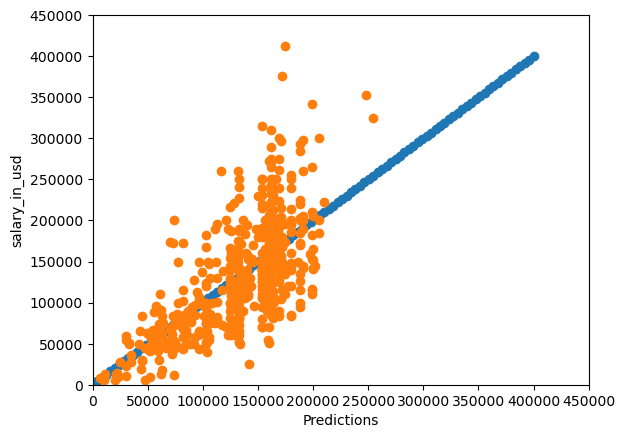

In [20]:
from scipy.sparse import hstack
import matplotlib.pyplot as plt

print(len(df_target_train[df_target_train["salary_in_usd"] > 350000]))

pred_df = pd.DataFrame(columns=["Predictions"], data=predictions_best)

df_target_blabla = df_target_test
pred_blabla = pred_df
display(df_target_blabla)
display(pred_blabla)
print(r2_score(df_target_blabla, pred_blabla))

compare_results = pd.concat([df_target_blabla, pred_blabla], axis=1)
compare_results2 = pd.concat([df_target_test, pred_df], axis=1)
x = np.linspace(0, 400000, 100)
y_actual = x + np.random.normal(0, 1, 100)  # Simulated actual values

# Plotting the data points
plt.scatter(x, y_actual, label='Actual')
plt.scatter(data=compare_results, x="Predictions", y="salary_in_usd")
# plt.scatter(data=compare_results2, x="Predictions", y="salary_in_usd")
plt.xlim(0, 450000)
plt.ylim(0, 450000)
plt.xlabel("Predictions")
plt.ylabel("salary_in_usd")
plt.show()
# Check best model